In [78]:
import pandas as pd
import json
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msno
from scipy.stats import zscore

#### IMPORTAR DATOS DEL JSON

In [ ]:
# Leer los datos del archivo JSON
data_raw = pd.read_json('./Ventas_registro.json')

#### ANALIZAR INFORMACIÓN BÁSICA

In [ ]:
# Primeras 10 filas
print(data_raw.head(10))

In [ ]:
# Dimensión del dataset
data_raw.shape

In [ ]:
# Nombre de las columnas
data_raw.columns.values

In [ ]:
# Tipo de datos
data_raw.dtypes

In [ ]:
# Información de los datos
data_raw.info()

------

In [ ]:
# Resumen de datos numéricos
data_raw.describe()

In [ ]:
# Resumen de datos categoricos
data_raw.describe(include=['object'])

#### ANALIZAR VALORES AUSENTES (MISSING)

In [ ]:
pd.isnull(data_raw["tipo_venta"])

In [ ]:
pd.isnull(data_raw["fecha_venta"])

In [ ]:
pd.isnull(data_raw["pago_total"])

In [ ]:
pd.isnull(data_raw["cliente"])

------

In [ ]:
pd.isnull(data_raw["tipo_venta"]).values.ravel().sum()

In [ ]:
pd.isnull(data_raw["fecha_venta"]).values.ravel().sum()

In [ ]:
pd.isnull(data_raw["pago_total"]).values.ravel().sum()

In [ ]:
pd.isnull(data_raw["cliente"]).values.ravel().sum()

#### ANALIZAR GRÁFICOS

In [ ]:
sns.countplot(x=data_raw['tipo_venta'])
plt.title('Cantidad de Ventas por Tipo (0 - Estándar, 1 - Promoción)')
plt.xlabel('Tipo de Venta')
plt.ylabel('Cantidad')
plt.show()

In [ ]:
data_raw['fecha_venta'] = pd.to_datetime(data_raw['fecha_venta'], format='%d/%m/%Y')
sns.countplot(x=data_raw['fecha_venta'].dt.month)
plt.title('Cantidad de Ventas por Mes')
plt.xlabel('Mes')
plt.ylabel('Número de Ventas')
plt.show()

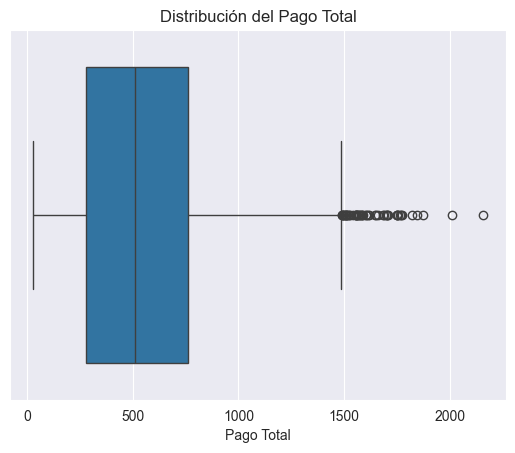

In [77]:
sns.boxplot(x=data_raw['pago_total'])
plt.title('Distribución del Pago Total')
plt.xlabel('Pago Total')
plt.show()

In [ ]:
# Para cliente no se puede realizar gráfica por tener valores muy largos

------

In [ ]:
# Gráfico con todas las variables
plt.figure(figsize=(20,8))
sns.boxplot(data=data_raw)
plt.show()

#### ANALIZAR VALORES AUSENTES (GENERAL)

In [ ]:
#Análisis de los valores ausentes
data_raw.isnull().sum()

In [ ]:
#Porcentaje de los valores ausentes
data_raw.isnull().sum()/data_raw.shape[0]*100

In [ ]:
#Mapa de calor de missing
sns.heatmap(data_raw.isnull(), cbar=False, cmap="bwr")
plt.show()

In [ ]:
#Matriz de representación
msno.matrix(data_raw, figsize=(12,6))
plt.show()

In [ ]:
#Representación de missing
msno.bar(data_raw, figsize=(12,6))
plt.show()

In [ ]:
#Evaluar la correlación de nulidad: qué tan fuertemente la presencia o ausencia de una variable afecta la presencia de otra:
msno.heatmap(data_raw, figsize=(12,6))
plt.show()

In [ ]:
#El dendrograma permite correlacionar de forma más completa la compleción de variables #revela tendencias más profundas que las visibles por pares en el mapa de calor de correlación:
msno.dendrogram(data_raw, figsize=(12,6))
plt.show()

##### IDENTIFICAR VALORES OUTLIERS

In [80]:
# Calcular el Z-score de la columna 'pago_total'
data_raw['z_pago_total'] = zscore(data_raw['pago_total'])